In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import pandas as pd

In [17]:
df = pd.read_csv('cleanedData.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_p = le.fit_transform(df['Parking'])
label_w = le.fit_transform(df['Warehouse'])
label_e = le.fit_transform(df['Elevator'])
label_a = le.fit_transform(df['Address'])

In [19]:
df['Parking'] = label_p
df['Warehouse'] = label_w
df['Elevator'] = label_e
df['Address'] = label_a
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,156,1.850000e+09,61666.67
1,60,1,1,1,1,156,1.850000e+09,61666.67
2,79,2,1,1,1,117,5.500000e+08,18333.33
3,95,2,1,1,1,152,9.025000e+08,30083.33
4,123,2,1,1,1,150,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3449,86,2,1,1,1,163,3.500000e+09,116666.67
3450,83,2,1,1,1,105,6.800000e+09,226666.67
3451,75,2,0,0,0,115,3.650000e+08,12166.67
3452,105,2,1,1,1,39,5.600000e+09,186666.67


In [20]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
train

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
1,60,1,1,1,1,156,1.850000e+09,61666.67
2,79,2,1,1,1,117,5.500000e+08,18333.33
3,95,2,1,1,1,152,9.025000e+08,30083.33
4,123,2,1,1,1,150,7.000000e+09,233333.33
5,70,2,1,1,0,106,2.050000e+09,68333.33
...,...,...,...,...,...,...,...,...
3449,86,2,1,1,1,163,3.500000e+09,116666.67
3450,83,2,1,1,1,105,6.800000e+09,226666.67
3451,75,2,0,0,0,115,3.650000e+08,12166.67
3452,105,2,1,1,1,39,5.600000e+09,186666.67


In [21]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator','Address']])
y = np.asanyarray(train[['Price(USD)']])
regr.fit(x,y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 2.62535740e+03  3.13852410e+04 -1.06248659e+04  4.01194936e+04
   3.77801256e+04  1.12360490e+01]]


In [22]:
y_hat = regr.predict(test[['Area','Room','Parking','Warehouse','Elevator','Address']])
x_test = np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator','Address']])
y_test = np.asanyarray(test[['Price(USD)']])

print('Variance score %.2f' % regr.score(x_test,y_test))

Variance score 0.52


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


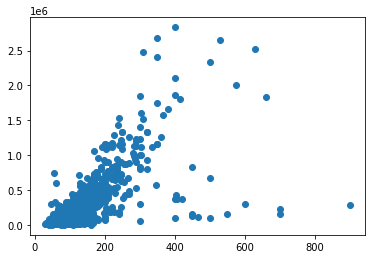

In [23]:
plt.scatter(train.Area,train['Price(USD)'])

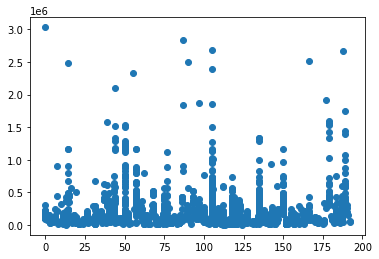

In [48]:
plt.scatter(train.Address,train['Price(USD)'])